## Question: From the given Iris dataset predict optimum number of clusters.

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# data importing
iris = pd.read_csv('/content/drive/MyDrive/The spark foundation/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Dropping Id column from dataset
iris= iris.drop('Id', axis=1)

### Analysing the data

In [ ]:
iris.shape

(150, 5)

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### statistical Analysis

In [ ]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Creating boxplot

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

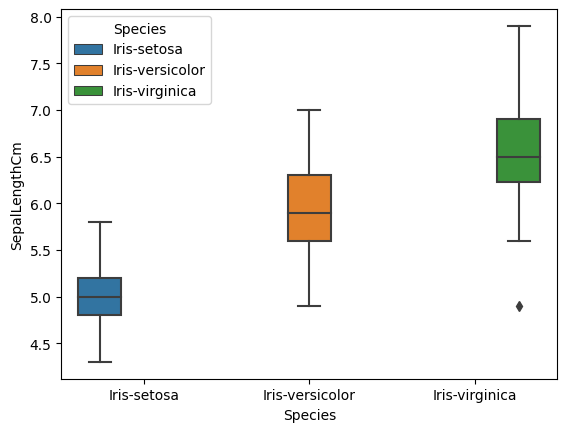

In [ ]:
#creating boxplot species vs SepalLengthCm
sns.boxplot(data= iris, x= 'Species', y= 'SepalLengthCm', hue= 'Species')

(1.88, 4.5200000000000005)

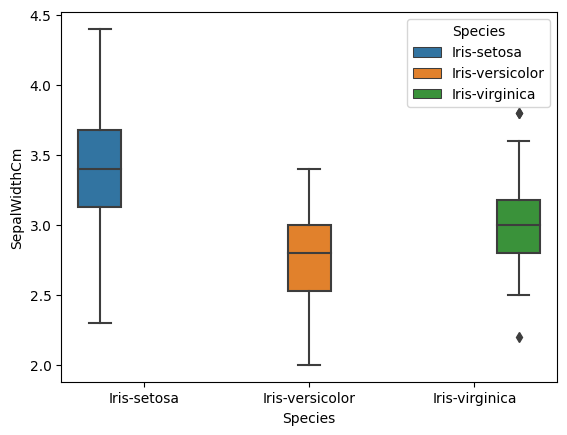

In [ ]:
#creating boxplot species vs SepalWidthCm
plt.figure()
sns.boxplot(data= iris, x= 'Species', y= 'SepalWidthCm', hue= 'Species')
plt.ylim()

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

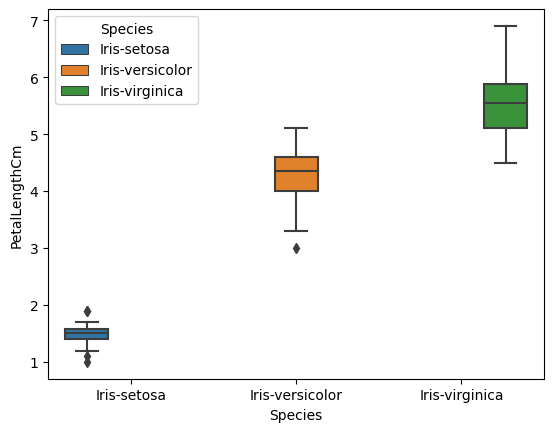

In [ ]:
#creating boxplot species vs PetalLengthCm
sns.boxplot(data= iris, x= 'Species', y= 'PetalLengthCm', hue= 'Species')

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

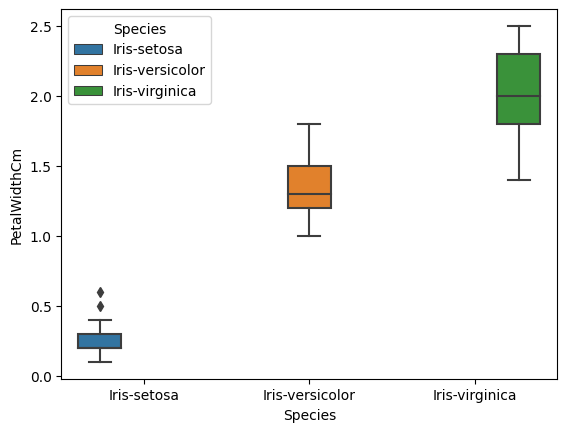

In [ ]:
#creating boxplot species vs PetalWidthCm
sns.boxplot(data= iris, x= 'Species', y= 'PetalWidthCm', hue= 'Species')

#### Creating pairplot

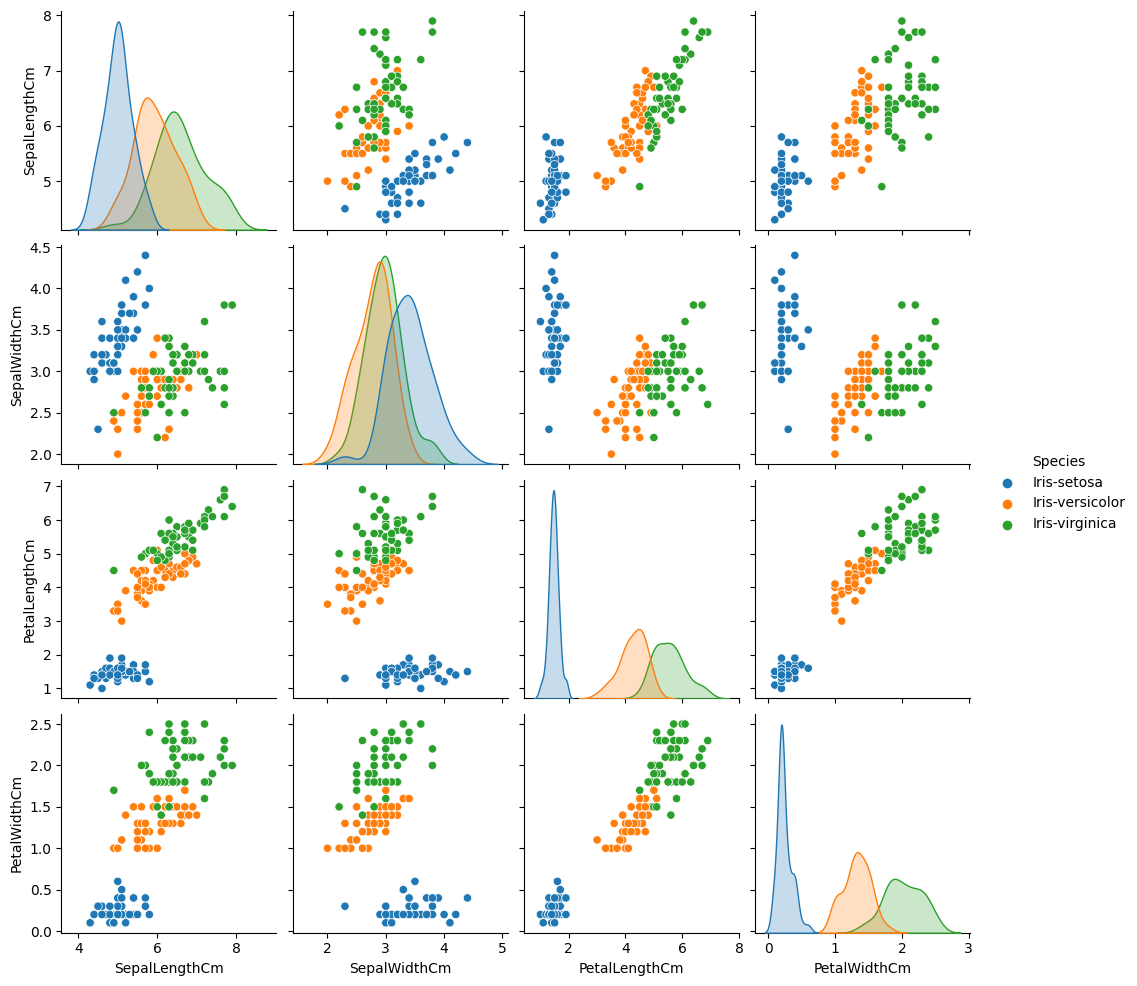

In [ ]:
sns.pairplot(iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']], hue='Species')

### From the above pairplot we can clearly see that flowers can be distinguished from petal width, petal length and sepal length.
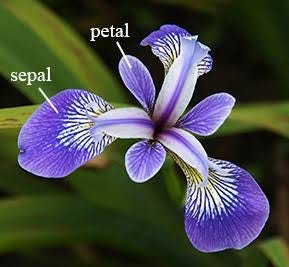

In [ ]:
#deleting the Species column
df = iris.drop('Species', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Importing sklearn library

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler= MinMaxScaler()
iris1 = scaler.fit_transform(df)

In [ ]:
from sklearn.cluster import KMeans

## Elbow curve to find cluster size

In [ ]:
ls=[]
for k in range(2,20):
  kmeans= KMeans(n_clusters = k)
  kmeans.fit(iris1)
  ls.append([k,kmeans.inertia_])

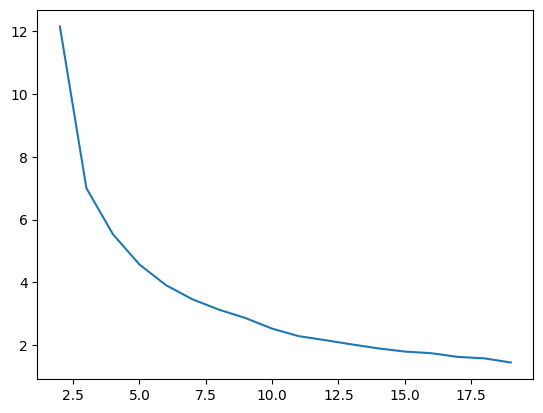

In [ ]:

er=pd.DataFrame(ls,columns=["No. of clusters","Error"])
plt.plot(er["No. of clusters"],er["Error"])
plt.show()

### from above graph we can say that 3 cluster can be made.

In [ ]:
k=3

### predicting the data

In [ ]:
kmeans= KMeans(n_clusters=k, init = 'k-means++',max_iter = 400, random_state = 100)
kmeans.fit(iris1)

KMeans(max_iter=400, n_clusters=3, random_state=100)

In [ ]:
output = kmeans.predict(iris1)

In [ ]:
iris['cluster'] = output

In [ ]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


<Axes: xlabel='cluster', ylabel='PetalWidthCm'>

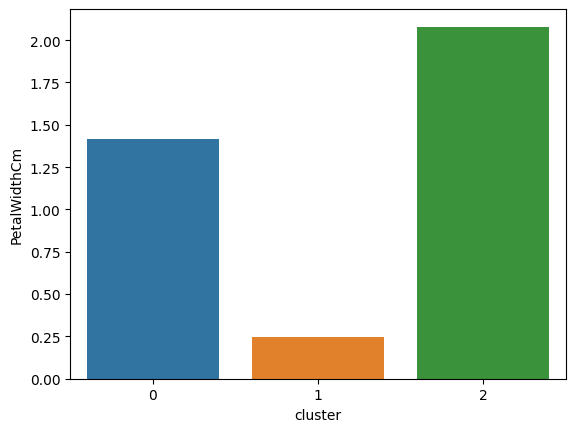

In [ ]:
sns.barplot(iris, x='cluster', y='PetalWidthCm', ci=None)

In [ ]:
iris[iris['Species']=='Iris-virginica'].max()

SepalLengthCm               7.9
SepalWidthCm                3.8
PetalLengthCm               6.9
PetalWidthCm                2.5
Species          Iris-virginica
cluster                       2
dtype: object

In [ ]:
iris[iris['Species']=='Iris-virginica'].min()

SepalLengthCm               4.9
SepalWidthCm                2.2
PetalLengthCm               4.5
PetalWidthCm                1.4
Species          Iris-virginica
cluster                       0
dtype: object

In [ ]:
iris[iris['Species']=='Iris-setosa'].max()

SepalLengthCm            5.8
SepalWidthCm             4.4
PetalLengthCm            1.9
PetalWidthCm             0.6
Species          Iris-setosa
cluster                    1
dtype: object

In [ ]:
iris[iris['Species']=='Iris-setosa'].min()

SepalLengthCm            4.3
SepalWidthCm             2.3
PetalLengthCm            1.0
PetalWidthCm             0.1
Species          Iris-setosa
cluster                    1
dtype: object

In [ ]:
iris[iris['Species']=='Iris-versicolor'].max()

SepalLengthCm                7.0
SepalWidthCm                 3.4
PetalLengthCm                5.1
PetalWidthCm                 1.8
Species          Iris-versicolor
cluster                        2
dtype: object

In [ ]:
iris[iris['Species']=='Iris-versicolor'].min()

SepalLengthCm                4.9
SepalWidthCm                 2.0
PetalLengthCm                3.0
PetalWidthCm                 1.0
Species          Iris-versicolor
cluster                        0
dtype: object

### Mapping the clusters: 0 as Iris-versicolour, 1 as'Iris-setosa',2 as 'Iris-virginica'

In [ ]:
iris['cluster'] = iris["cluster"].map({0:'Iris-versicolour',1:'Iris-setosa',2:'Iris-virginica'})

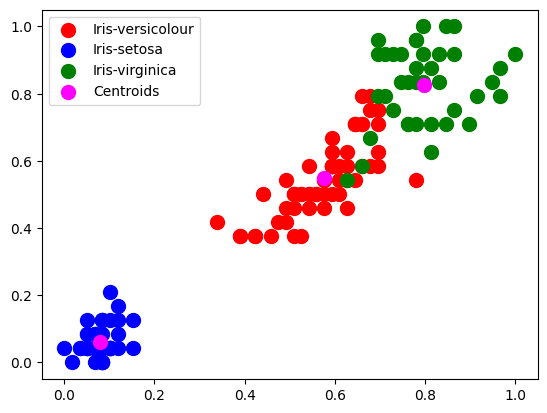

In [ ]:
plt.scatter(iris1[output==0,2],iris1[output==0,3], s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(iris1[output==1,2],iris1[output==1,3], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(iris1[output==2,2],iris1[output==2,3], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 100, c = 'magenta', label = 'Centroids')

plt.legend()

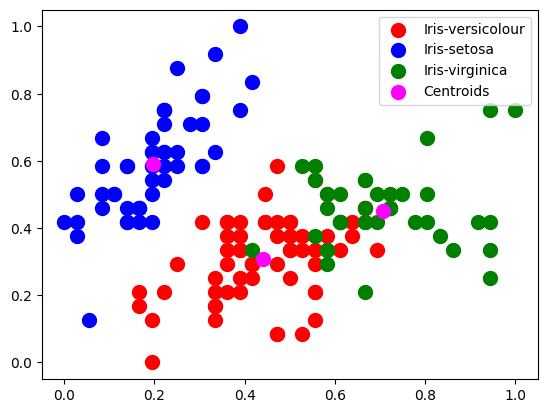

In [ ]:
plt.scatter(iris1[output==0,0],iris1[output==0,1], s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(iris1[output==1,0],iris1[output==1,1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(iris1[output==2,0],iris1[output==2,1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'magenta', label = 'Centroids')

plt.legend()

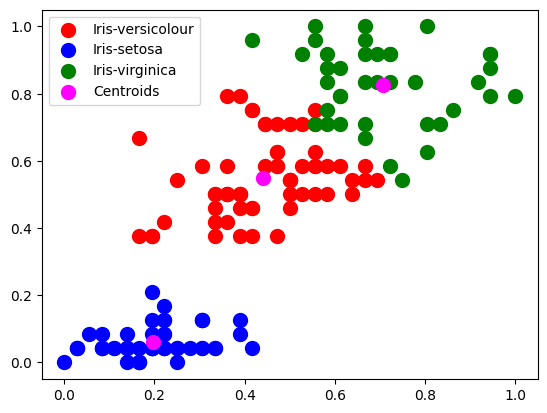

In [ ]:
plt.scatter(iris1[output==0,0],iris1[output==0,3], s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(iris1[output==1,0],iris1[output==1,3], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(iris1[output==2,0],iris1[output==2,3], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,3], s = 100, c = 'magenta', label = 'Centroids')

plt.legend()

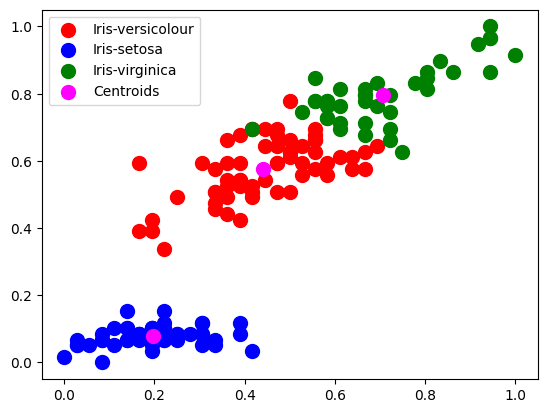

In [ ]:
plt.scatter(iris1[output==0,0],iris1[output==0,2], s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(iris1[output==1,0],iris1[output==1,2], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(iris1[output==2,0],iris1[output==2,2], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2], s = 100, c = 'magenta', label = 'Centroids')

plt.legend()

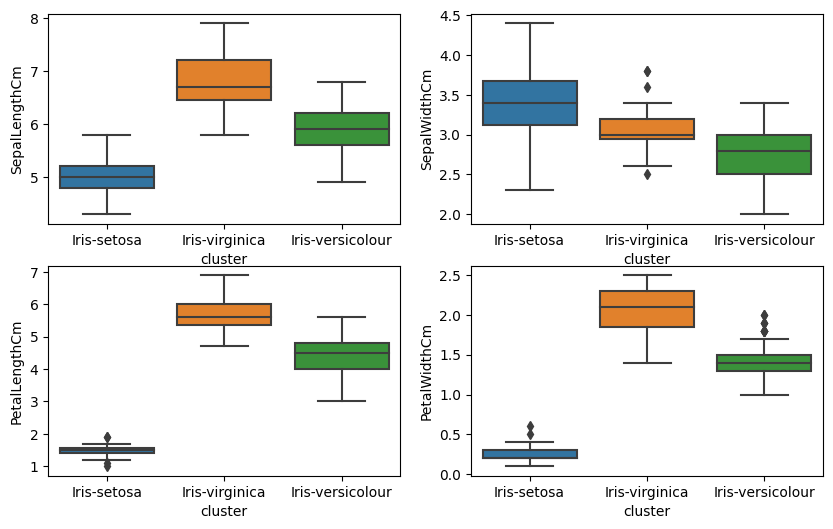

In [ ]:
plt.figure(figsize=[10,6])
plt.subplot(221)
sns.boxplot(x='cluster' ,y ='SepalLengthCm', data= iris)
plt.subplot(222)
sns.boxplot(x='cluster' ,y ='SepalWidthCm', data= iris)
plt.subplot(223)
sns.boxplot(x='cluster' ,y ='PetalLengthCm', data= iris)
plt.subplot(224)
sns.boxplot(x='cluster' ,y ='PetalWidthCm', data= iris)
plt.show()

## **Observation**


*   Flower with **sepal length 4.3 to 5.8 cm**, **sepal width between 2.3 to 4.4 cm** ,**petal length between 1 to 1.9 cm** and **petal width between 0.1 to 0.6 cm** are **Iris-setosa**


*   Flower with **sepal length 4.9 to 7 cm**, **sepal width between 2 to 3.4 cm** ,**petal length between 3 to 5.1 cm** and **petal width between 1 to 1.8 cm** are **Iris-versicolour**


*   Flower with **sepal length 4.9 to 7.9 cm**, **sepal width between 2.2 to 3.8 cm** ,**petal length between 4.5 to 6.9 cm** and **petal width between 1.4 to 2.5 cm** are **Iris-virginica**

